Dataset called: A field test of mechanisms underpinning animal diversity in recently burned landscapes

In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load in df

file = 'JAPPL-2021-00281_data.csv'
raw = pd.read_csv(file)
raw.head()

,Site,Burn_status,Amount_unburnt,Habitat_interspersion,External_connectivity,Internal_connectivity,Largest_unburnt_refuge,NSF_availability,Canopy_availability,Effort_reptiles,...,LD_count,MG_count,PV_count,SI_count,Reptile_species_richness,CL_count,SM_count,MM_count,VV_reports,Native_mammal_species_richness
0,100-1,1,1680.777230,53.2108,100,14.16,0.4950,22,6,130,...,3,1,0,0,4,0,0,0,7,0
1,100-2,1,809.088590,69.5523,100,41.32,0.2748,28,8,130,...,2,1,0,0,8,0,0,1,11,0
2,100-3,1,1563.041078,55.1049,100,11.06,0.5698,20,0,140,...,6,1,0,0,5,1,0,1,13,1
3,100-4,1,1523.804873,56.1048,100,38.46,0.4350,12,4,140,...,5,2,1,0,10,0,1,3,18,1
4,300-1,1,384.397394,82.8329,300,70.71,0.1410,12,0,130,...,0,0,0,0,4,2,1,2,13,2


### Column Descriptions for Manuscript ID: JAPPL-2021-00281

- **Site**: site identifier. Numbered site identifiers are impact sites (in planned burn area, e.g. 100-1). Site identifiers that begin with "C" (e.g. C1) are control sites outside the planned burn area.

- **Burn_status**: predictor variable - whether the site was burnt by planned fire (1) or a control site (2).

- **Amount_unburnt**: predictor variable - amount of unburnt vegetation (square metres) in 1ha area surrounding each site. Mallee vegetation is patchy, so control sites have varying amounts.

- **NSF_availability**: predictor variable - the number of times near surface vegetation cover (including *T. scariosa*, shrubs, tree trunks, and resprouting eucalypts <0.5 m tall) were present (defined as ≥1 'touch' on or above a structure pole) each metre along a 50 m transect at each site.

- **Canopy_availability**: predictor variable - the number of times canopy cover (trees >2 m) was present (defined as ≥1 'touch' on or above a structure pole) each metre along a 50 m transect at each site.

- **Reptile_species_richness**: response variable - reptile species richness at each site.

- **Native_mammal_species_richness**: response variable - native mammal species richness at each site.

In [5]:
# Drop trap-related columns, not relevant to our story

less = raw.drop(['Effort_camera', 'Effort_mammals_pit_Elliott', 'Effort_mammals_pit', 'Effort_reptiles'], axis=1)
less.columns

Index(['Site', 'Burn_status', 'Amount_unburnt', 'Habitat_interspersion',
       'External_connectivity', 'Internal_connectivity',
       'Largest_unburnt_refuge', 'NSF_availability', 'Canopy_availability',
       'BA_count', 'CF_count', 'CB_count', 'DV_count', 'DN_count', 'EI_count',
       'LBo_count', 'LD_count', 'MG_count', 'PV_count', 'SI_count',
       'Reptile_species_richness', 'CL_count', 'SM_count', 'MM_count',
       'VV_reports', 'Native_mammal_species_richness'],
      dtype='object')

In [6]:
# Condensing the reptile and mammal specie rows to general reptile and mammal counts

less['Reptile_count'] = less['BA_count'] + less['CF_count'] + less['CB_count'] + less['DV_count'] + \
                            less['DN_count'] + less['EI_count'] + less['LBo_count'] + less['LD_count'] + \
                            less['MG_count'] + less['PV_count'] + less['SI_count']
less['Mammal_count'] = less['CL_count'] + less['SM_count'] + less['MM_count']

less[['Reptile_count', 'Mammal_count']]

,Reptile_count,Mammal_count
0,7,0
1,6,1
2,9,2
3,15,4
4,5,5
5,7,1
6,4,4
7,8,0
8,9,3
9,4,0


In [7]:
# Drop the specific specie rows (except for VV_reports)

df = less[['Site', 'Burn_status', 'Amount_unburnt', 'Habitat_interspersion', \
       'External_connectivity', 'Internal_connectivity', \
       'Largest_unburnt_refuge', 'NSF_availability', 'Canopy_availability', \
        'Reptile_count', 'Mammal_count']]
df.head()

,Site,Burn_status,Amount_unburnt,Habitat_interspersion,External_connectivity,Internal_connectivity,Largest_unburnt_refuge,NSF_availability,Canopy_availability,Reptile_count,Mammal_count
0,100-1,1,1680.777230,53.2108,100,14.16,0.4950,22,6,7,0
1,100-2,1,809.088590,69.5523,100,41.32,0.2748,28,8,6,1
2,100-3,1,1563.041078,55.1049,100,11.06,0.5698,20,0,9,2
3,100-4,1,1523.804873,56.1048,100,38.46,0.4350,12,4,15,4
4,300-1,1,384.397394,82.8329,300,70.71,0.1410,12,0,5,5


In [8]:
# Turn the Burn_status column to a Boolean 0/1 scale

df.loc[df['Burn_status'] == 2, 'Burn_status'] = 0

print(df['Burn_status'].unique())

[1 0]


In [9]:
# For storytelling simplicity, focus in on a few columns and eliminate less relevant ones
# We want to focus on how the burn itself and leftover cover affect animal biodiversity after a burn

df = df.drop(columns = ['Habitat_interspersion', 'External_connectivity', 'Internal_connectivity', 'Largest_unburnt_refuge'])

# This will allow us to focus on the amount of burnt land and available cover as relating to the animal counts found.

## Off to the Races: The Story

* This dataset, "A field test of mechanisms underpinning animal diversity in recently burned landscapes," represents an experiment conducted on 20 sites, 12 of which were part of a planned controlled burn. The other 8 remained untouched.
* The parts we will be focusing on are the burn status of each site, available cover in each site, and the animal life found within each. (7 columns total: Site, Burn_status, Amount_unburnt, NSF_availability, Canopy_availability, Reptile_count, and Mammal_count).
* I want to examine how these controlled burns affected habitat available cover and animal numbers. 
* The animal counts were arranged in columns by species, but for our purposes we have combined them into general mammal- and reptile counts. 

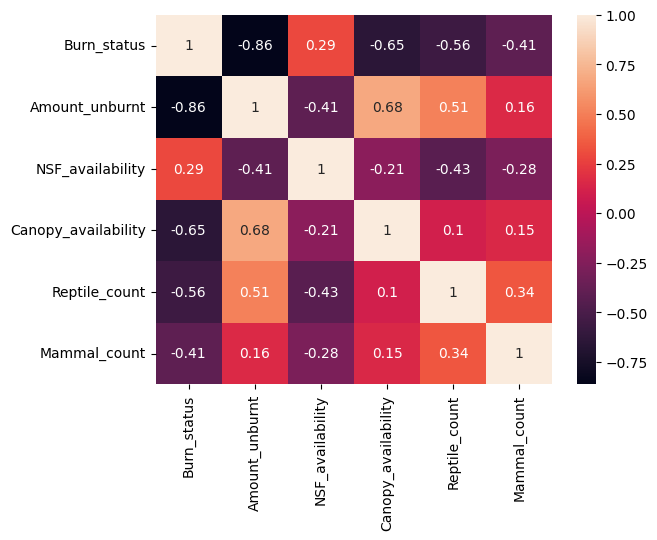

Burn_status     Burn_status            1.000000
                Amount_unburnt         0.863446
Amount_unburnt  Canopy_availability    0.677123
Burn_status     Canopy_availability    0.651304
                Reptile_count          0.558081
Amount_unburnt  Reptile_count          0.509166
Burn_status     NSF_availability            NaN
dtype: float64

In [12]:
# Looking at correlations: heatmap

num = df.select_dtypes(exclude='object')
corre = sns.heatmap(data = num.corr(), annot = True, cbar = True)
plt.show()

# Columns with correlations of .75 and up, and columns with correlations of .5 and up:

corr_df = num.corr()
corr_abs = corr_df.abs()

corr_75 = corr_abs[corr_abs >= 0.75].unstack().sort_values(ascending = False).drop_duplicates()
corr_50 = corr_abs[corr_abs >= 0.5].unstack().sort_values(ascending = False).drop_duplicates()
corr_50

* Burn_status and Amount_unburnt showed the most correlation, which made sense.
* They also each showed some correlation with Canopy_availability and Reptile_count.
* As the Amount_unburnt increased, so did Canopy_availability and Reptile_count.
* NSF_availability did correlate with Burn_status, but not with Amount_unburnt.
* Mammal_count showed a negative correlation with Burn_status but not many strong correlations in general.

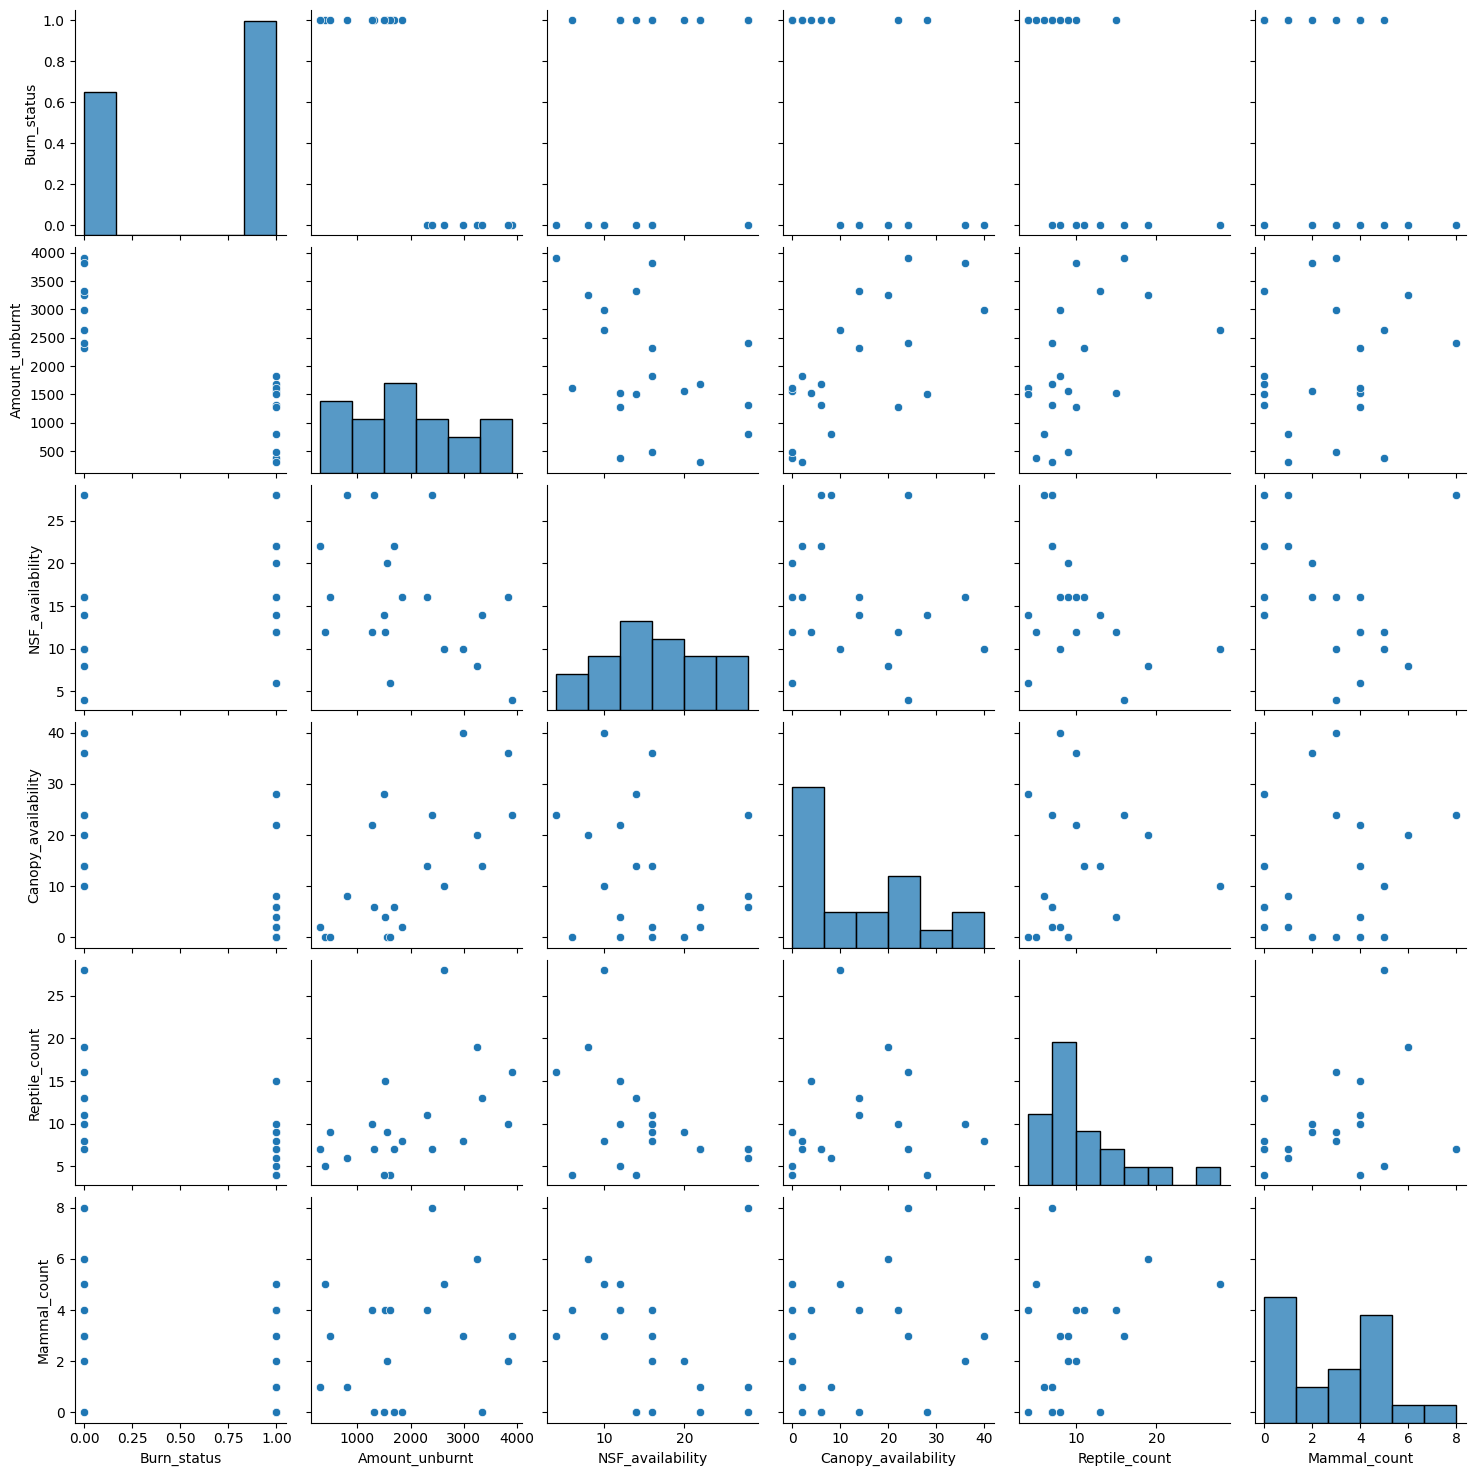

In [14]:
# Pairplot trend time

sns.pairplot(df)
plt.show()

##### Notes and Observations:

- Burn_status:
    - NSF_availability seems to have increased, indicating burned sites actually had more near-surface vegetative cover available
    - Canopy_availability decreased, meaning higher-elevation cover was burnt away, probably aiding the increase of NSF_availability.
    - Reptile_count and Mammal_count both decreased.
- Amount_unburnt:
    - 2000 seems to be the point that divides burnt from unburnt sites
- NSF_availability:
    - Negative trend with Reptile_count and Mammal_count
- Canopy_availability:
    - Positive trend with Amount_unburnt
- Reptile_count:
    - Negative trend with NSF_ and Canopy_availability
    - Positive trend with Mammal_count
- Mammal_count:
    - Negative trend with NSF_availability
    - Few visibly notable trends

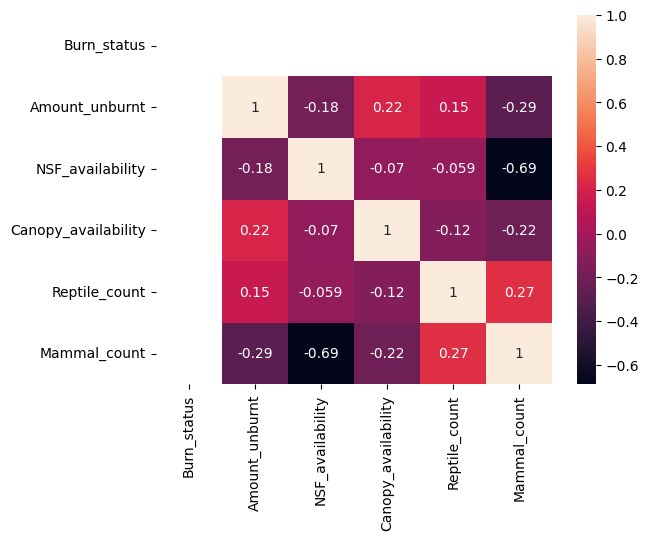

In [16]:
# Correlation plot on only burnt sites

burnt = df.loc[df['Burn_status']==1]
burnt_num = burnt.select_dtypes(exclude='object')

sns.heatmap(burnt_num.corr(), annot=True)
plt.show()

* The strongest correlation among burned sites came from Mammal_count and NSF_availability--low cover availability affected mammals the most.

In [18]:
# Strongest burnt site correlations

burnt_corr = burnt_num.corr()
burnt_corr_75 = burnt_corr[burnt_corr.abs() >= 0.75].unstack().sort_values(ascending = False).drop_duplicates()

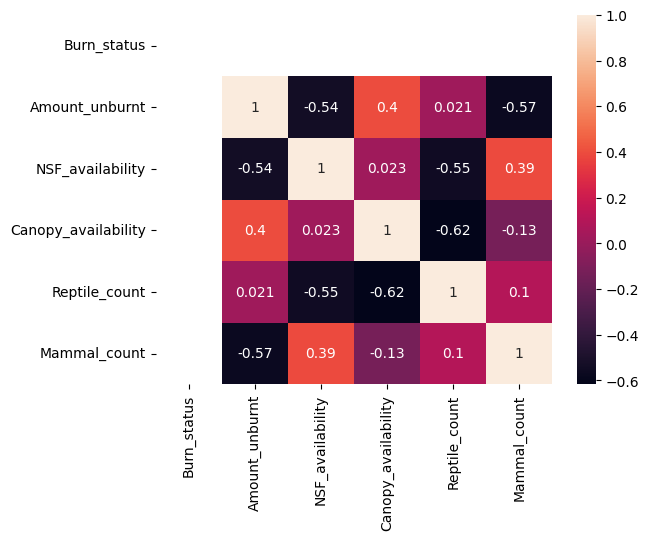

Amount_unburnt       Amount_unburnt      1.000000
                     NSF_availability   -0.539331
NSF_availability     Reptile_count      -0.552082
Amount_unburnt       Mammal_count       -0.572501
Canopy_availability  Reptile_count      -0.617406
Burn_status          Burn_status              NaN
dtype: float64


In [19]:
# Correlation plot on unburnt sites

unb = df.loc[df['Burn_status']==0]
unb_num = unb.select_dtypes(exclude='object')

sns.heatmap(unb_num.corr(), annot=True)
plt.show()

# Strongest unburnt site correlations

unb_corr = unb_num.corr()
unb_corr_50 = unb_corr[unb_corr.abs() >= 0.50].unstack().sort_values(ascending = False).drop_duplicates()
print(unb_corr_50)

* For unburnt (control) sites, there were more significant correlations across variables.
* Reptiles seemed to decrease as available cover became more abundant, both in the canopy and near the surface.
* Mammal_count and Amount_unburnt had a similarly odd negative relationship.

Text(0.5, 1.0, 'Near-Surface and Canopy Cover Across Burnt and Unburnt Sites')

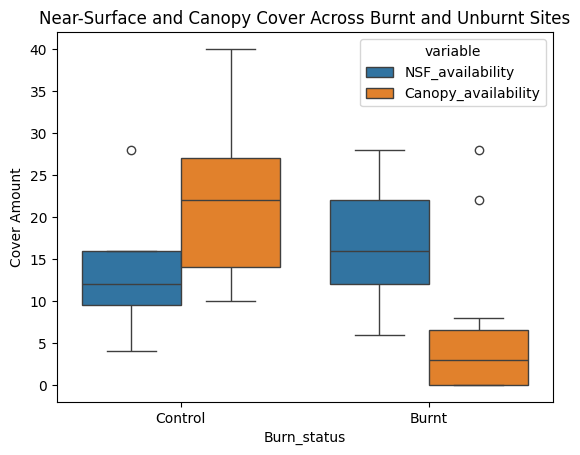

In [21]:
sns.color_palette()
sns.boxplot(data=df.melt(id_vars='Burn_status', value_vars=['NSF_availability', 'Canopy_availability']),
            x='Burn_status', y='value', hue='variable')
plt.xticks(ticks=[0, 1], labels=["Control", "Burnt"])
plt.ylabel('Cover Amount')
plt.title("Near-Surface and Canopy Cover Across Burnt and Unburnt Sites")

* NSF_availability actually increased in burnt sites (as compared to control sites)! However, Canopy_availability decreased significantly. I suspect that as higher cover died, broke, and fell, it became near-surface cover. This shifting of cover ratios could be the reason for Reptile_count's strange correlation with the cover variables. After the burn, reptile numbers decreased. They also decreased when either cover increased. This means that the reptiles likely relied on NSF-cover, and after the burn, though NSF cover increased in comparison to canopy cover, the reptiles declined due to the fire. (This is likely a case of correlation, not causation.)

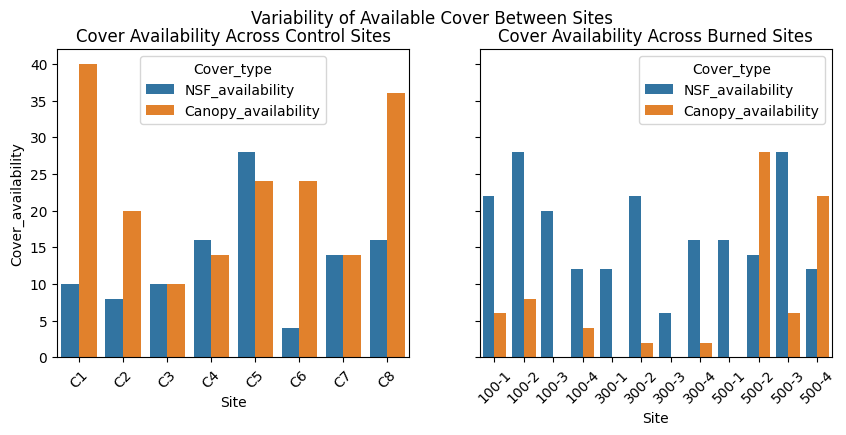

In [23]:
# A bar graph of available cover variability between sites

df_burn_0 = df[df['Burn_status'] == 0]
df_burn_1 = df[df['Burn_status'] == 1]
site_cover_0 = df_burn_0.melt(id_vars = 'Site', value_vars = ['NSF_availability', 'Canopy_availability'], var_name = 'Cover_type', value_name = 'Cover_availability')
site_cover_1 = df_burn_1.melt(id_vars = 'Site', value_vars = ['NSF_availability', 'Canopy_availability'], var_name = 'Cover_type', value_name = 'Cover_availability')

fig, axes = plt.subplots(1, 2, sharey = True, figsize = (10, 4))
fig.suptitle('Variability of Available Cover Between Sites')
sns.barplot(ax = axes[0], data = site_cover_0, x = 'Site', y = 'Cover_availability', hue = 'Cover_type')
axes[0].set_title('Cover Availability Across Control Sites')
axes[0].tick_params(labelrotation=45, axis = 'x')
sns.barplot(ax = axes[1], data = site_cover_1, x = 'Site', y = 'Cover_availability', hue = 'Cover_type')
axes[1].set_title('Cover Availability Across Burned Sites')
axes[1].tick_params(labelrotation=45, axis = 'x')
plt.show()

* I went on to examine the distribution of cover availability among sites, separating the control sites (first graph) from the burned sites (second). Canopy cover almost uniformly fell in burn sites; however, near-surface cover was, on average, higher in burned sites.

In [25]:
# Dataframe of melted animal count numbers for the next graphs

animal_melt = df.melt(id_vars = ['Site', 'Canopy_availability', 'NSF_availability', 'Burn_status', 'Amount_unburnt'], \
                      value_vars = ['Reptile_count', 'Mammal_count'], var_name = 'Animal_type', value_name = 'Animal_count')

animal_melt = animal_melt.melt(id_vars = ['Site', 'Burn_status', 'Amount_unburnt', 'Animal_type', 'Animal_count'], \
                               value_vars = ['Canopy_availability', 'NSF_availability'], \
                               var_name = 'Cover_type', value_name = 'Cover_availability')

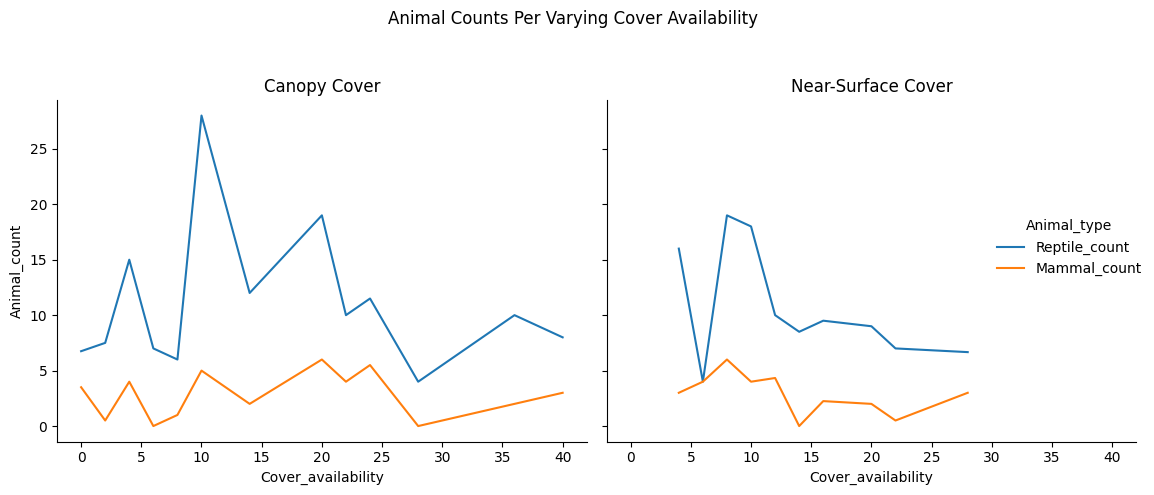

In [26]:
# Animal numbers vs canopy and NSF availability

g = sns.relplot(data=animal_melt, kind="line", x="Cover_availability", y="Animal_count", hue="Animal_type", col="Cover_type", errorbar= None)
g.fig.suptitle('Animal Counts Per Varying Cover Availability')
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.8)
custom_titles = {"Canopy_availability": "Canopy Cover", "NSF_availability": "Near-Surface Cover"}
# g.set_titles(col_template="{col_name}")
for ax, col_name in zip(g.axes.flat, g.col_names):
    ax.set_title(custom_titles.get(col_name, col_name))           
plt.show()

* This graph shows (for reptiles) the trend we have been seeing: a slight trend downward as cover increases, both near- and canopy-level. The line is much less stable in relation to canopy cover, which makes me suspect they cared less about Canopy_availability. Mammal counts didn't change very much depending on cover.

Text(0.5, 1.0, 'Animal Counts Across Burned and Unburned Sites')

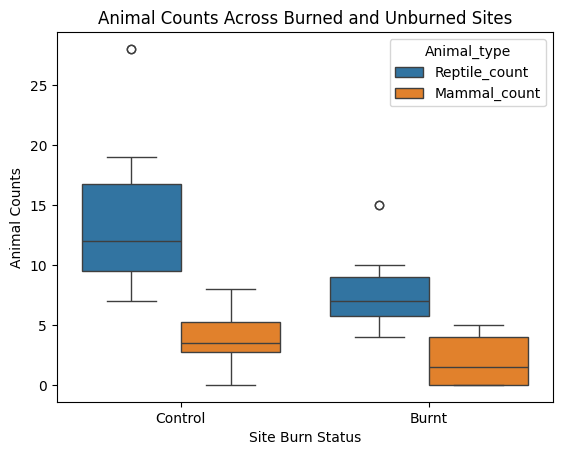

In [28]:
# Animal numbers vs burn status

sns.boxplot(data=animal_melt, x='Burn_status', y='Animal_count', hue='Animal_type')
plt.xticks(ticks=[0, 1], labels=["Control", "Burnt"])
plt.ylabel('Animal Counts')
plt.xlabel('Site Burn Status')
plt.title("Animal Counts Across Burned and Unburned Sites")

* Finally, I wanted to examine animal counts across burnt and unburnt sites. As one would expect, in sites which had been burned, there appeared to be fewer mammals and reptiles. However, reptiles decreased far more than mammals did; possibly, they were more sensitive to the change, better at hiding, or were just more numerous and therefore displayed the change more strongly.

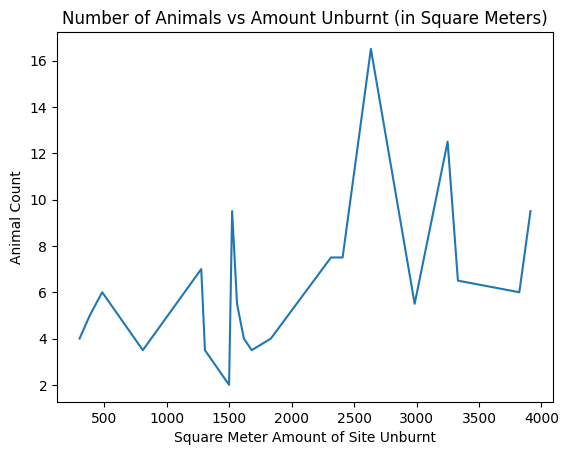

In [30]:
# Animal numbers vs amt (un)burnt

sns.lineplot(data = animal_melt, x = 'Amount_unburnt', y = 'Animal_count', errorbar = None)
plt.title('Number of Animals vs Amount Unburnt (in Square Meters)')
plt.xlabel('Square Meter Amount of Site Unburnt')
plt.ylabel('Animal Count')
plt.show()

* This graph, while showing quite a bit of noise (which I attribute to small sample size), does back up what the previous graph suggested. Between 2000 and 2500 square-meters of unburnt land appears to be where the distinction between burned and unburned sites is, with unburned sites having far more critters.